In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, neighbors
import pickle
import time

In [2]:
from matplotlib.colors import ListedColormap



def knn_comparison(data, n_neighbors = 15):
    '''
    This function finds k-NN and plots the data.
    '''
    X = data[:, :2]
    y = data[:,2] 
    
    
    
    # grid cell size
    h = .02
    cmap_light = ListedColormap(['#FFAAAA',  '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#0000FF'])


    # the core classifier: k-NN
    clf = neighbors.KNeighborsClassifier(n_neighbors, algorithm='kd_tree', n_jobs = 6)
    clf.fit(X, y)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    # we create a mesh grid (x_min,y_min) to (x_max y_max) with 0.02 grid spaces
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    # we predict the value (either 0 or 1) of each element in the grid
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    
    # xx.ravel() will give a flatten array

    # np.c_ : Translates slice objects to concatenation along the second axis.
    # > np.c_[np.array([1,2,3]), np.array([4,5,6])]
    # > array([[1, 4],
    #          [2, 5],
    #          [3, 6]])   (source: np.c_ documentation)
    
    
    
    
    # convert the out back to the xx shape (we need it to plot the decission boundry)
    Z = Z.reshape(xx.shape)
    
    
    # pcolormesh will plot the (xx,yy) grid with colors according to the values of Z
    # it looks like decision boundry
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
   
    # scatter plot of with given points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    
    #defining scale on both axises
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
   
    # set the title
    plt.title('K value = '+str(n_neighbors))
    

    plt.show()

### Meshgrid explanation
![title](demo_data/meshgrid_image.png)
please check this link <a href='https://stackoverflow.com/a/36014586'> stackoverflow meshgrid explanation </a>

In [3]:
#Function to pickle in an object.
def openPickleFile(name): #name = the pickle file name, this should be passed as a string inside " ".
    global temp
    temp = pickle.load(open(name + ".pickle","rb"))
    return temp

In [4]:
openPickleFile("y_train")
y_train = temp
print(y_train.shape)
print(y_train.dtype)

(33334,)
object


In [5]:
y_train[y_train == 'positive'] = 1
y_train[y_train == 'negative'] = 0
y_train = y_train.astype(float)
print(y_train.dtype)

float64


# 1. KNN on TSNE data for Unigrams

In [6]:
openPickleFile("X_train_BOW_unigram_tsne")
X_train = temp
print(X_train.shape)
print(X_train)

(33334, 2)
[[ 12.46622326  26.68865382]
 [  1.17547167  -1.30889228]
 [ -5.1770876  -31.8098705 ]
 ...
 [  0.64622451  -3.06533227]
 [  0.24541933 -45.5613387 ]
 [ -0.64599662 -47.17865137]]


In [7]:
tsne_unigram_knn = np.vstack((X_train.T, y_train)).T
tsne_unigram_knn[:10]

array([[ 12.46622326,  26.68865382,   1.        ],
       [  1.17547167,  -1.30889228,   1.        ],
       [ -5.1770876 , -31.8098705 ,   1.        ],
       [ -9.74715031, -17.77416487,   1.        ],
       [-25.36763171,  23.77683997,   1.        ],
       [-39.57646594,   5.01752664,   1.        ],
       [-48.09820569,   5.20315321,   1.        ],
       [ 27.72836818, -35.67299516,   1.        ],
       [ -1.28733792,  50.82676503,   1.        ],
       [  1.95348326,   8.09297895,   1.        ]])

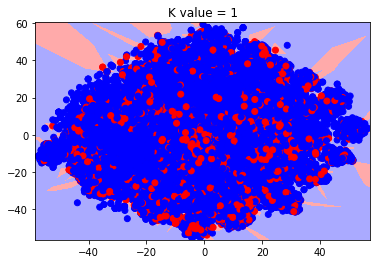

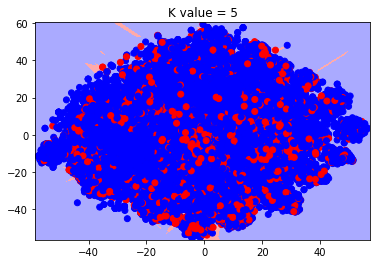

Decision boundary plot for unigrams done! Time elapsed: 161.62275862693787 seconds


In [8]:
time_start = time.time()

data = tsne_unigram_knn
knn_comparison(data, 1)
knn_comparison(data, 5)
#knn_comparison(data,10) # not running knn for k > 5 due to memory constraint.
#knn_comparison(data, 30)
#knn_comparison(data, 50)

print ('Decision boundary plot for unigrams done! Time elapsed: {} seconds'.format(time.time()-time_start))

# 2. KNN on TSNE data for Bigrams

In [9]:
openPickleFile("X_train_BOW_bigram_tsne")
X_train = temp
print(X_train.shape)
print(X_train)

(33334, 2)
[[ 22.667371   -13.87228896]
 [  4.79317407  -6.40870396]
 [ -1.39810703 -40.15319331]
 ...
 [  5.64008344  -8.01493589]
 [  4.06429635 -42.74992263]
 [  0.84614955 -42.09851174]]


In [10]:
tsne_bigram_knn = np.vstack((X_train.T, y_train)).T
tsne_bigram_knn[:10]

array([[ 2.26673710e+01, -1.38722890e+01,  1.00000000e+00],
       [ 4.79317407e+00, -6.40870396e+00,  1.00000000e+00],
       [-1.39810703e+00, -4.01531933e+01,  1.00000000e+00],
       [-2.97281337e+00, -1.81053448e+01,  1.00000000e+00],
       [ 2.47792032e+01,  2.56770829e+01,  1.00000000e+00],
       [-3.82841114e+01, -5.41023646e+00,  1.00000000e+00],
       [-3.32412659e+01, -1.49775912e+01,  1.00000000e+00],
       [ 1.97454541e+01, -3.90826839e+01,  1.00000000e+00],
       [ 1.44975145e+00,  3.10543362e+01,  1.00000000e+00],
       [ 3.82629166e+00, -2.55940990e-02,  1.00000000e+00]])

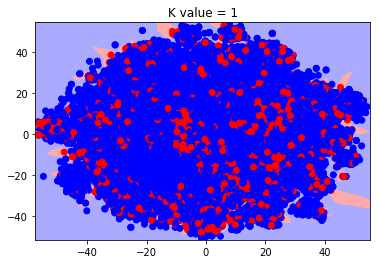

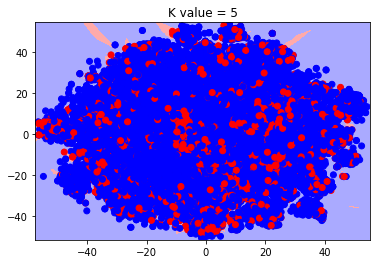

Decision boundary plot for bigrams done! Time elapsed: 151.61812376976013 seconds


In [11]:
time_start = time.time()

data = tsne_bigram_knn
knn_comparison(data, 1)
knn_comparison(data, 5)
#knn_comparison(data,10)
#knn_comparison(data, 30)
#knn_comparison(data, 50)

print ('Decision boundary plot for bigrams done! Time elapsed: {} seconds'.format(time.time()-time_start))

# 3. KNN on TSNE data for TFIDF

In [12]:
openPickleFile("X_train_tf_idf_tsne")
X_train = temp
print(X_train.shape)
print(X_train)

(33334, 2)
[[ -6.09953507   6.72497237]
 [-33.4692973  -20.47437808]
 [ -1.84562687  -2.5333012 ]
 ...
 [ 17.30156288  -1.01735313]
 [ 38.11994295 -19.71465405]
 [ -3.47598292  -7.55473966]]


In [13]:
tsne_tfidf_knn = np.vstack((X_train.T, y_train)).T
tsne_tfidf_knn[:10]

array([[ -6.09953507,   6.72497237,   1.        ],
       [-33.4692973 , -20.47437808,   1.        ],
       [ -1.84562687,  -2.5333012 ,   1.        ],
       [ -8.07274374,  -3.98360279,   1.        ],
       [  9.64113849,  35.96819367,   1.        ],
       [-12.3497836 ,  -0.76080194,   1.        ],
       [ -7.61918423,  -2.26280933,   1.        ],
       [ 17.59937456, -42.68771985,   1.        ],
       [-16.23895667, -38.75031904,   1.        ],
       [  9.02301126,   2.55665807,   1.        ]])

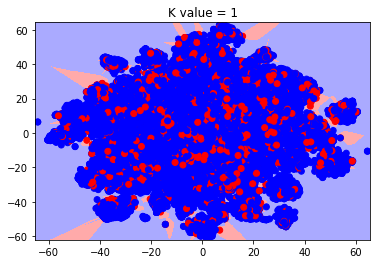

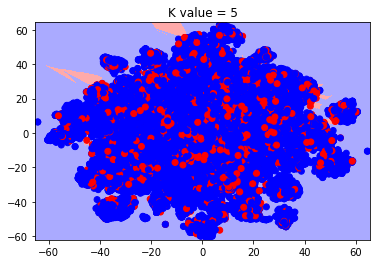

Decision boundary plot for TFIDF done! Time elapsed: 224.97084212303162 seconds


In [14]:
time_start = time.time()

data = tsne_tfidf_knn
knn_comparison(data, 1)
knn_comparison(data, 5)
#knn_comparison(data,10)
#knn_comparison(data, 30)
#knn_comparison(data, 50)

print ('Decision boundary plot for TFIDF done! Time elapsed: {} seconds'.format(time.time()-time_start))

# 4. KNN on TSNE data for Avg W2V

In [15]:
openPickleFile("X_train_sent_vectors_tsne")
X_train = temp
print(X_train.shape)
print(X_train)

(33334, 2)
[[ -5.18932776 -19.85113463]
 [-19.38656338 -19.90727633]
 [-20.17817352 -19.47306158]
 ...
 [ -0.39182819   4.35762239]
 [-21.10855306  -4.28585356]
 [-20.65119548  -3.79581033]]


In [16]:
tsne_avgW2V_knn = np.vstack((X_train.T, y_train)).T
tsne_avgW2V_knn[:10]

array([[ -5.18932776, -19.85113463,   1.        ],
       [-19.38656338, -19.90727633,   1.        ],
       [-20.17817352, -19.47306158,   1.        ],
       [-20.11263443, -19.5024637 ,   1.        ],
       [  5.16453617,  24.89837405,   1.        ],
       [ -6.31161523, -16.06661957,   1.        ],
       [-18.18604745, -20.29845003,   1.        ],
       [ -3.11659633, -20.20568029,   1.        ],
       [ 15.52497751, -31.30764978,   1.        ],
       [-18.07904379, -19.5207553 ,   1.        ]])

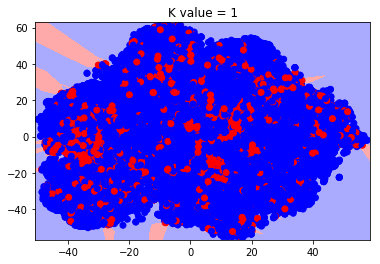

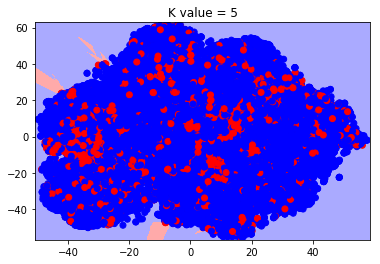

Decision boundary plot for AvgW2V done! Time elapsed: 159.00680494308472 seconds


In [17]:
time_start = time.time()

data = tsne_avgW2V_knn
knn_comparison(data, 1)
knn_comparison(data, 5)
#knn_comparison(data,10)
#knn_comparison(data, 30)
#knn_comparison(data, 50)

print ('Decision boundary plot for AvgW2V done! Time elapsed: {} seconds'.format(time.time()-time_start))

# 5. KNN on TSNE data for TFIDF Avg W2V

In [6]:
openPickleFile("X_train_tfidf_sent_vectors_TSNE")
X_train = temp
print(X_train.shape)
print(X_train)

(33334, 2)
[[ 51.00725692  29.94390113]
 [-15.98265073 -10.0386827 ]
 [-16.32168028  -9.79519485]
 ...
 [-27.39748169   0.14538634]
 [-12.5409894   26.0431301 ]
 [-15.2099629   23.31137254]]


In [7]:
tsne_tfidf_avgW2V_knn = np.vstack((X_train.T, y_train)).T
tsne_tfidf_avgW2V_knn[:10]

array([[ 51.00725692,  29.94390113,   1.        ],
       [-15.98265073, -10.0386827 ,   1.        ],
       [-16.32168028,  -9.79519485,   1.        ],
       [-16.4440653 ,  -9.7829083 ,   1.        ],
       [  8.09462469,  24.50343399,   1.        ],
       [-16.31809016, -10.79098239,   1.        ],
       [-16.54285144, -10.87098334,   1.        ],
       [ 51.06519495,  29.9545503 ,   1.        ],
       [ -0.98337165, -37.02678634,   1.        ],
       [-16.06369131, -11.99429725,   1.        ]])

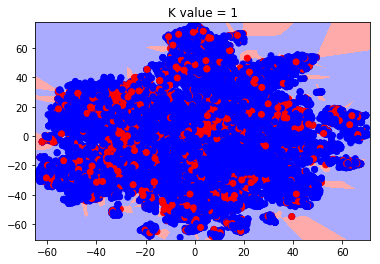

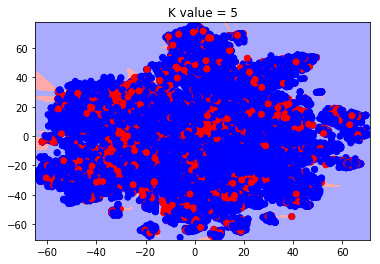

Decision boundary plot for TFIDF AvgW2V done! Time elapsed: 254.49245524406433 seconds


In [8]:
time_start = time.time()

data = tsne_tfidf_avgW2V_knn
knn_comparison(data, 1)
knn_comparison(data, 5)
#knn_comparison(data,10)
#knn_comparison(data, 30)
#knn_comparison(data, 50)

print ('Decision boundary plot for TFIDF AvgW2V done! Time elapsed: {} seconds'.format(time.time()-time_start))